
## Overview:   
This notebook demonstrates how to leverage different data formats for OMXWare results for downstream analysis.


In [11]:
%matplotlib inline

import json
from IPython.display import display

import omxware


# --- Authentication options --- #
# generate token with OMXWare user name and password (likely done once and then stored in file, see usage below)
# token = omxware.get_token('harsha', '<pwd>') # fill in password to initiate token

# or

# use previously generated token loaded from file
token_path = "./omxware_collaborative_work/super_awesome_token"  # update for your path to the token file you create
f = open(token_path)
token = f.readline()

# provide your token to authenticate with OMXWare
omx = omxware.omxware(token)

### Retrieve gene data from OMXWare as a Pandas Dataframe

In [14]:
search_string = 'sporulation'
response = omx.genes(gene_name=search_string, page_size=25)

#total_results = response.total_results()
#print(total_results)

results_df = response.results(type='df')
results_df.head()

,genera,genomes,id,name,omx_creation_ts,omx_modified_ts,sequence_length,type
0,[staphylococcus],[ERR178812],7a3321662f4a3d9615854543ec8dbe21,sporulation regulator WhiA,2018-02-16T17:18:22.748Z,2018-07-26T03:53:57.308Z,945,gene
1,[flavobacterium],[SRR4237026],426a6724c2cec6990cc484be406423ba,Sporulation kinase E,2018-02-28T18:15:43.542Z,2018-02-28T18:15:43.542Z,1149,gene
2,[bacillus],[GCF_001518875.1],e09aabef4f22b5798e3c9262e1aa5147,Sporulation kinase E,2018-01-27T02:57:27.528Z,2018-01-27T02:57:27.528Z,2406,gene
3,[bacillus],[GCF_000493375.1],b4db0386d303a215e06a3a99a9371d6a,Sporulation protein YjcA,2018-02-04T21:54:23.741Z,2018-02-04T21:54:23.741Z,381,gene
4,[pseudomonas],"[ERR1189827, GCF_000481405.1, GCF_000795925.1,...",2219008d73665bf11880459a1224ffac,Sporulation kinase A,2018-02-02T00:00:58.119Z,2018-02-02T00:00:58.119Z,1593,gene


### Distribution of Genes by Genera

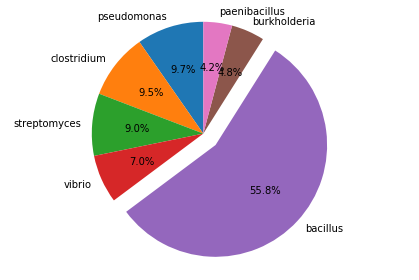

In [15]:
response.show_facets(name='genera', topN=7)

### Retrieve gene data from OMXWare as JSON

In [16]:
results_json = response.results(type='json')
print(json.dumps(results_json[:3], indent=4, sort_keys=True))

[
    {
        "genera": [
            "staphylococcus"
        ],
        "genomes": [
            "ERR178812"
        ],
        "id": "7a3321662f4a3d9615854543ec8dbe21",
        "name": "sporulation regulator WhiA",
        "omx_creation_ts": "2018-02-16T17:18:22.748Z",
        "omx_modified_ts": "2018-07-26T03:53:57.308Z",
        "sequence_length": 945,
        "type": "gene"
    },
    {
        "genera": [
            "flavobacterium"
        ],
        "genomes": [
            "SRR4237026"
        ],
        "id": "426a6724c2cec6990cc484be406423ba",
        "name": "Sporulation kinase E",
        "omx_creation_ts": "2018-02-28T18:15:43.542Z",
        "omx_modified_ts": "2018-02-28T18:15:43.542Z",
        "sequence_length": 1149,
        "type": "gene"
    },
    {
        "genera": [
            "bacillus"
        ],
        "genomes": [
            "GCF_001518875.1"
        ],
        "id": "e09aabef4f22b5798e3c9262e1aa5147",
        "name": "Sporulation kinase E",
        "o

### Retrieve gene data from OMXWare as an Object

In [17]:
results_list = response.results(type='list')

# By default, the API returns a `list`
print("Returns: List of {} objects \nResults: {}\n".format(response.type(), response.total_results()) )
    
gene = results_list[0]
print("Id  \t\t=> " + gene.id())
print("Name   \t\t=> " + gene.name())
print("Sequence   \t=> " + gene.sequence()[:100] + "...")
print("Sequence length => " + str(gene.sequence_length()))

print("\n\n JSON:")
print(gene.json())

Returns: List of gene objects 
Results: 70686

Id  		=> 7a3321662f4a3d9615854543ec8dbe21
Name   		=> sporulation regulator WhiA
Sequence   	=> ATGAGCTTTGCATCAGAAATGAAAAATGAATTAACTAGAATAGACGTCGATGAAATGAATGCAAAGGCAGAGCTCAGTGCACTGATTCGAATGAATGGTG...
Sequence length => 945


 JSON:
{'id': '7a3321662f4a3d9615854543ec8dbe21', 'name': 'sporulation regulator WhiA', 'type': 'gene', 'genera': ['staphylococcus'], 'genomes': ['ERR178812'], 'sequence_length': 945, 'omx_creation_ts': '2018-02-16T17:18:22.748Z', 'omx_modified_ts': '2018-07-26T03:53:57.308Z'}


### Retrieve gene data from OMXWare as FASTA

In [18]:
new_gene_object = omx.genes(ids='00054a98f8ddd95e3f46d9d757137284').results(type='fasta')
print(new_gene_object)

>OMX_gene_00054a98f8ddd95e3f46d9d757137284|Sensor histidine kinase RcsC
ATGAACGAGAAGGTGCTGCTGGTTGACGACGACGAGGCCATCCGCGAAGTCCTCAGCCTCTCCATCGCCGACCTGGGCTACGACGTGGAAACCGCCCCCGGCGGCCGCGAAGCCCTGGAGCTGTGCGCCACCTTCAAACCGTCCATCGTGCTCACCGACATCAAGATGCCCGGCATGGACGGCATCGAACTGCTCTCGCGCGTCAAAGCCCTCGATCCCGAGATCGAGGTCATCATGATTTCCGGCCATGGCGACATGGAACTGGCCATCGAGAGCCTCAAGCGCCAGGCCCTGGATTTCCTCACCAAGCCCGTGCGCGACGAACTGCTCACAGCCTCCCTCCACCGGGCCGCCGACCGCGTGTCCATGCGCCGCCAGATCACCGAACACACCCGCAATCTCGAACGGCTGGTGCGCGAAAAATCCGCCCGCCTGGTCGAGATGGAGCGCCGCATGGCCGTGGGGCAGGCCGTGGAGGGCGTGGCCAGCGCCATCGAGGGGCTCATTGCCTCCTTCGACCAGGGACCCAGCTATTTCAACCAGATGCCCTGCTGCATCGTCATCCACAACCGCTACCTCGAAATCGTGGCCGTAAACACCCTGGGCCGGCAGCGCCTGGGCGAGGTGGTGGGCAAGATGAGCTGGGAACTCTACGCCGACCGTCAGGGCAGCGGCAACGCCTGCCCGGTCTGGCGCACCGTGGAACAAGGCCAGGGCCAGCGCGGCCGCGAGACCTTCCGCGACAAGGACGGCCGCGAGATTCCGGTGCTGATCCATACCGCCCCGGTCTTCGGCACGGACGGCCAGGTGGAGCTGGTCATCGAGATCGCCGCCGACGTGGCCGAGGTGGGCCGGCTCCAGGAAGAGCTGCGGGCCGTGCGCGAGAAATTCCAGCGCCTGTTCGACGCCGTGCCCTGCGCCATCGCCG

### Retrieve Gene query results as fasta

In [19]:
results_fasta = response.results(type='fasta')
print(results_fasta)

>OMX_gene_7a3321662f4a3d9615854543ec8dbe21|sporulation regulator WhiA
ATGAGCTTTGCATCAGAAATGAAAAATGAATTAACTAGAATAGACGTCGATGAAATGAATGCAAAGGCAGAGCTCAGTGCACTGATTCGAATGAATGGTGCACTTAGTCTTTCAAATCAACAATTTGTTATAAATGTTCAAACGGAAAATGCAACAACGGCAAGACGTATTTATTCGTTGATTAAACGTGTCTTTAATGTGGAAGTTGAAATATTAGTCCGTAAAAAAATGAAACTTAAAAAAAATAATATTTATATTTGTCGTACAAAGATGAAAGCGAAAGAAATTCTTGATGAATTAGGAATTTTAAAAGACGGCATTTTTACGCATGAAATTGATCATTCAATGATTCAAGATGACGAAATGAGACGTAGTTACTTGAGAGGAGCTTTTCTCGCAGGTGGCTCTGTGAATAACCCTGAAACATCTTCATACCATTTGGAAATTTTTTCTCAAAATGAGAGTCATGCAGAAGGCTTAACGAAACTAATGAATAGTTATGAGTTGAATGCCAAACATTTAGAGCGAAAAAAAGGAAGTATTACGTATTTAAAAGAAGCGGAAAAAATTTCGGATTTTCTTAGTTTGATAGGTGGTTATCAAGCGTTATTAAAATTTGAAGACGTACGTATTGTAAGAGATATGCGTAATTCTGTTAACCGACTCGTTAATTGTGAAACGGCAAATCTAAATAAAACAGTTAGTGCTGCGATGAAACAAGTTGAGAGCATTAAATTGATTGATAAAGAAATTGGTATTGAAAATTTACCAGACAGGTTGAGAGAGATTGCTAGAATTCGAGTAGAACATCAAGAAATTTCGTTGAAAGAGCTTGGAGAAATGGTATCAACTGGTCCAATTTCAAAATCAGGTGTAAATCATCGATTAAGAAAACTTAATGATTTAGCCGATAAGATTAGAAATGGTGAA